In [1]:
#Import all the libraries necessary to this research

#Data Preparation and Analysis
import pandas as pd
import numpy as np

#Data Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams



# Time Series Model and Model Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from scipy import signal
from sklearn.model_selection import train_test_split


# Disable Warnings
from warnings import filterwarnings

In [2]:
filterwarnings('ignore') 

# Part I: Research Question




# A1. RESEARCH QUESTION
What is the projected revenue for network companies for the upcoming year?









# 









# A2. OBJECTIVES OR GOALS

The objectives or goals for this Time Series Analysis are as follows:

1. Undertake an exploratory data analysis to gain insights into the dataset.
2. Preprocess the data for Time Series analysis by applying appropriate transformations.
3. Develop an accurate predictive model that fits the data well.
4. Forecast the revenue for the upcoming year with the help of the generated Time Series model.





# 







# Part II: Method Justification


# B. SUMMARY OF ASSUMPTIONS

The assumptions underlying the time series model are as follows:

1. The residuals of the time series model should display no autocorrelation. Autocorrelation refers to the measurement of similarity between a time series and its lagged version over consecutive time intervals (Smith, 2021). This assumption ensures that the errors are independent and exhibit identical distribution.

2. The time series data should exhibit stationarity. Stationarity implies that the statistical properties of the time series, such as mean and variance, remain constant over time. Analyzing non-stationary data requires the identification and removal of trends and seasonality effects (Wu, 2021).





# 








# Part III: Data Preparation




In [3]:
# Import Data
churn_data = pd.read_csv('teleco_time_series .csv', index_col='Day', parse_dates=True)
pd.options.display.max_columns = None

# Print Head
churn_data.head()

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554


# 






# C1. LINE GRAPH VISUALIZATION

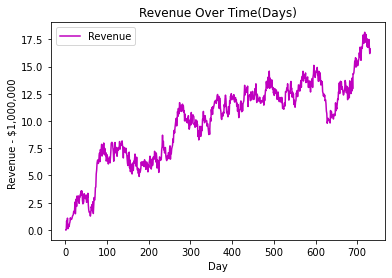

In [4]:
# Time Series Line. Series 
# Reference: G1

churn_data.plot(color='m')
plt.title("Revenue Over Time(Days)")
plt.ylabel("Revenue - $1,000,000 ")
plt.show();

# 






# C2. TIME STEP FORMATTING


In [5]:
# Time step formatting.

final_index_ = churn_data.index[-1]
total_records_ = len(churn_data)

print("The total number of records in the dataframe: ", total_records_)
print("The final index of the dataframe: ", final_index_)
print('\n')

print("The time sequence has {0} gaps located within it.".format(abs(final_index_ - total_records_)))

The total number of records in the dataframe:  731
The final index of the dataframe:  731


The time sequence has 0 gaps located within it.


# 





# C3. STATIONARITY

In [6]:
# Dickey-Fuller Test.

adf_test_ = adfuller(churn_data['Revenue'])
adf_test_

(-1.9246121573101809,
 0.32057281507939783,
 1,
 729,
 {'1%': -3.4393520240470554,
  '5%': -2.8655128165959236,
  '10%': -2.5688855736949163},
 965.0609576707513)

In [7]:
# Describe t-statistic. and p-values, of the Dickey-Fuller Test

print('Stationarity Test.')
print("t-statistic :", round(adf_test_[0], 2))
print("p-values :", round(adf_test_[1], 2))

Stationarity Test.
t-statistic : -1.92
p-values : 0.32


In [8]:
# Describe Critical values. of the Dickey-Fuller Test

critical_ = adf_test_[4]
print("By applying a 95 percent confidence interval, the critical value for the t-statistic is ", 
      round(critical_['5%'], 2))

By applying a 95 percent confidence interval, the critical value for the t-statistic is  -2.87


The Dickey-Fuller test was utilized for the analysis, assuming the null hypothesis that the time series is non-stationary due to the presence of a trend. Based on the results, there is substantial evidence to reject the null hypothesis and achieve a 95% confidence level, as the p-value should be below 0.05 and the t-statistic below -2.87. As the data is non-stationary, it will be transformed to facilitate the implementation of the ARIMA model.

# 







# C4. STEPS TO PREPARE THE DATA

The steps applied in preparing the data:

# STEP 1:  Inspect all data rows to detect the presence of null values.

In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  731 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


The above analysis shows us that there are'nt any null values present in the dataframe

# STEP 2: Create mock dates to represent the time series data.

In [10]:
# Convert churn dataframe to a one-dimensional array

churn_1da_ = churn_data.values.flatten() 

# Generate mock dates 
# Reference: G2

dates_ = pd.date_range('2002-1-1', freq='D', periods=len(churn_1da_))

# STEP 3: Generate a new Time Series Dataframe by combining mock dates and revenue data.

In [11]:
# New Time Series Dataframe
churn_ts_data = pd.DataFrame({'Date': dates_, 'Revenue Generated': churn_1da_})

# Dataframe Index Set to Date Column
churn_ts_data = churn_ts_data.set_index('Date')
churn_ts_data.head()

,Revenue Generated
Date,
2002-01-01,0.000000
2002-01-02,0.000793
2002-01-03,0.825542
2002-01-04,0.320332
2002-01-05,1.082554


# STEP 4: The new dataframe is split into training and test data, with 75% used for training and 25% for testing.

In [12]:
churn_train_data, churn_test_data = train_test_split(churn_ts_data, stratify=None, shuffle=False, test_size=0.25)

# 







# C5. PREPARED DATASET

In [13]:
# Export Data Sets as Excel files

churn_train_data.to_excel('churn_train_data.xlsx', index=False, encoding='utf-8')
churn_test_data.to_excel('churn_test_data.xlsx', index=False, encoding='utf-8')

# 







# Part IV: Model Identification and Analysis

# D1. REPORT FINDINGS AND VISUALIZATIONS

In [14]:
# Calculate the Time Series' First Difference

churn_diff_data = churn_data.diff().dropna()
churn_diff_data

,Revenue
Day,
2,0.000793
3,0.824749
4,-0.505210
5,0.762222
6,-0.974900
...,...
727,0.170280
728,0.559108
729,-0.687028


In [15]:
# Evaluate the differencein  using the Dickey Fuller Test
# Reference: G3

adf_test_ = adfuller(churn_diff_data['Revenue']) 

In [16]:
# Describe t-statistic. and p-values of the Dickey-Fuller Test

print('Stationarity Test')
print("t-statistic:", round(adf_test_[0], 2))
print("p-values:", round(adf_test_[1], 2))

Stationarity Test
t-statistic: -44.87
p-values: 0.0


In [17]:
# Describe Critical. Values of the Dickey-Fuller Test

critical_ = adf_test_[4]
print("By applying a 95% confidence interval, the critical value for the t-statistic is:", round(critical_['5%'], 2))

By applying a 95% confidence interval, the critical value for the t-statistic is: -2.87


After the first difference of the time series is calculated above, it is now evident that the data is stationary.

# D1 a

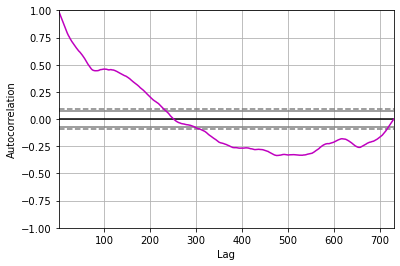

In [18]:
# Assess the presence of Seasonal Components
# Reference: G4

pd.plotting.autocorrelation_plot(churn_ts_data, color='m');

The above plot shows that there is no seasonal component present in the data

# D1 b

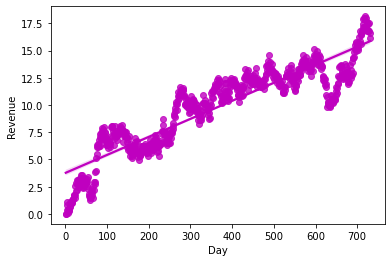

In [19]:
# Identify all trends. located in the data 
# Reference: G4

sns.regplot(data=churn_data, x=churn_data.index, y='Revenue', fit_reg=True, color='m');

The above visualization shows there trend within the data, and this trend is upward and positive data over time.

# D1 c

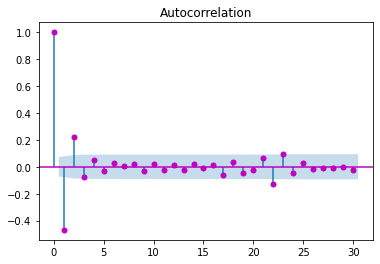

In [20]:
# Visaulize autocorrelation function, using 30 lags Reference: G4

plot_acf(churn_diff_data, lags=30, color='m')
plt.show()

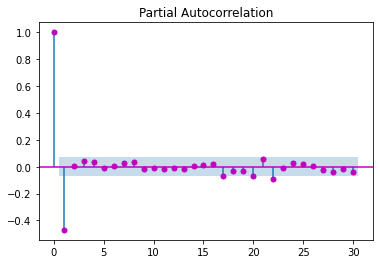

In [21]:
# Visualize partial autocorrelation, function using 30 lags Reference: G4

plot_pacf(churn_diff_data, lags=30, color='m')
plt.show()

# D1 d

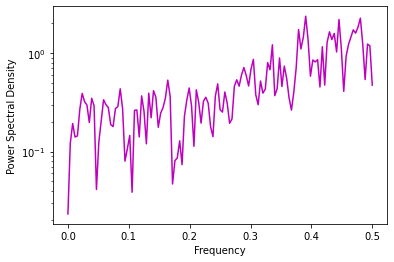

In [22]:
# Graph Power. Spectral Density 
# Reference: G5

frqcy_ , p_spec_ = signal.welch(churn_diff_data['Revenue'])
plt.semilogy(frqcy_, p_spec_, color='m')
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.show()

From the above figure it can be seen that the power spectral density reduces as frequency increases.

# D1 e

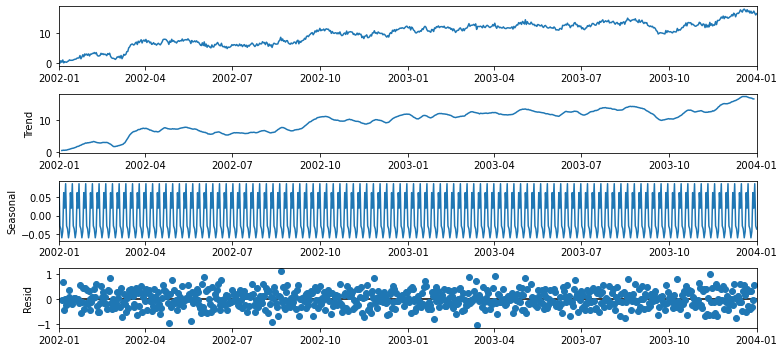

In [23]:
# Graph Decomposition
# Reference: G5

rcParams['figure.figsize'] = 11, 5
decomp_ = sm.tsa.seasonal_decompose(churn_ts_data)
decomp_.plot()
plt.show()

From the visualization above, the the residuals appear ro be randomly distributed, there is a compact consistency of seasonality, and an upward trend in the data.

# D1 f

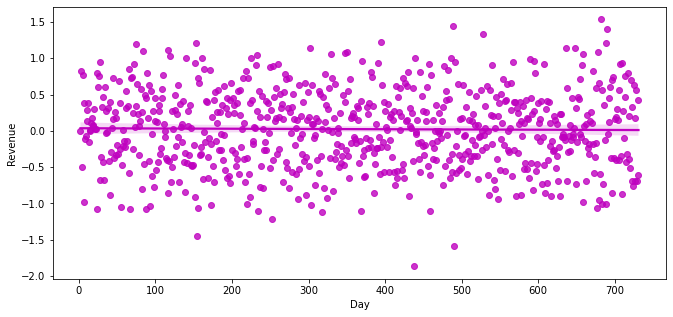

In [24]:
# Visualize existence of trends within residuals 
# Reference: G4

sns.regplot(data=churn_diff_data, x=churn_diff_data.index, y='Revenue', fit_reg=True, color='m');

The plot shows no trends when used with data transformed using the first difference.

# 







# D2. ARIMA MODEL
The model with the best fit will be determined using the Bayesian Information Criterion (BIC) and the Akaike information criterion (AIC). Lower values of AIC and BIC indicate higher model accuracy. Based on the results of both tests, the ARMA(1,0) model was found to be the best fit for the data. Since seasonality was not detected in the previous analyses, the seasonal order parameter was excluded from the model. Finally, ARIMA(1,1,0) was identified as the optimal model fit, as a differencing degree of 1 was used to eliminate the upward trend in the original data and achieve stationarity.

In [25]:
# AR. and MA. Ideal Values 
# Reference: G4


# Create empty/ list
oab_list_ = []

# Loop twice over a. and b. both in range 3:
for a in range(3):
    for b in range(3):
        arma_model_ = SARIMAX(churn_train_data, order=(a, 1, b)) # Instantiate ARMA model
        arma_results_ = arma_model_.fit() # Fit model to results

        # Append results to list as a tuple
        oab_list_.append((a, b, arma_results_.aic, arma_results_.bic))

# Create a dataframe from the tuple
churn_oab_data = pd.DataFrame(oab_list_, columns=['a', 'b', 'AIC', 'BIC'])


churn_oab_data.head()

,a,b,AIC,BIC
0,0,0,862.258903,866.563352
1,0,1,759.085658,767.694556
2,0,2,733.382848,746.296194
3,1,0,731.534150,740.143047
4,1,1,733.484668,746.398015


In [26]:
# Print top model in ascending to AIC
print(churn_oab_data.sort_values('AIC').head(1))

print('\n')

# Print top model in ascending BIC
print(churn_oab_data.sort_values('BIC').head(1))

   a  b        AIC         BIC
3  1  0  731.53415  740.143047


   a  b        AIC         BIC
3  1  0  731.53415  740.143047


In [27]:
# Instantiate ARMA model
arma_model_ = SARIMAX(churn_train_data, order=(1, 1, 0)) 


# Fit model to results
arma_results_ = arma_model_.fit() 


# Output MAE (Mean Absolute Error) of residuals
mae_ = np.mean(np.abs(arma_results_.resid))
mae_

0.3773346177363931

In [28]:
# Output summary of ARMA. results 
# Reference: G4


print(arma_results_.summary())

                               SARIMAX Results                                
Dep. Variable:      Revenue Generated   No. Observations:                  548
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -363.767
Date:                Sun, 23 Jul 2023   AIC                            731.534
Time:                        20:14:48   BIC                            740.143
Sample:                    01-01-2002   HQIC                           734.899
                         - 07-02-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4650      0.037    -12.491      0.000      -0.538      -0.392
sigma2         0.2213      0.014     15.596      0.000       0.193       0.249
Ljung-Box (L1) (Q):                   0.00   Jarque-

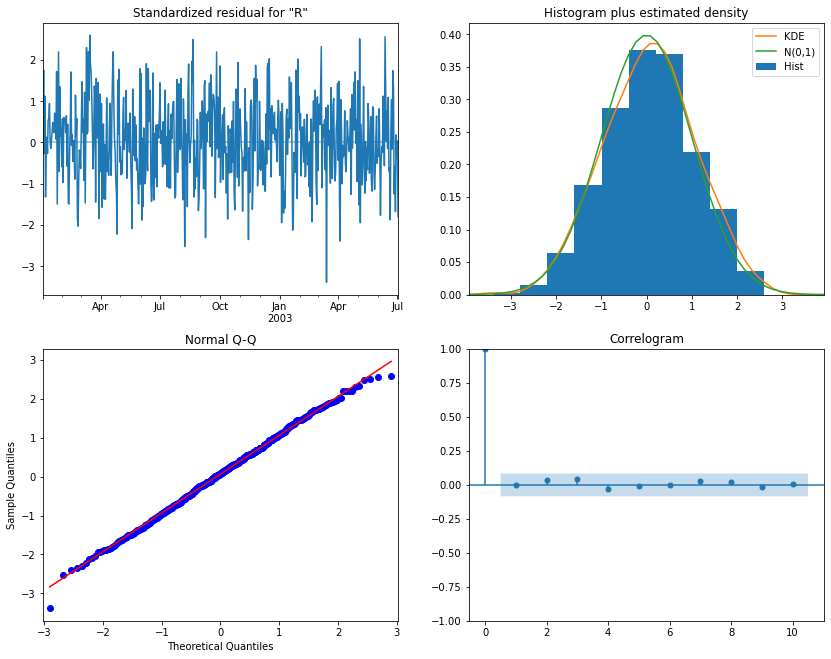

In [29]:
# Visualization of diagnostic. plots 
# Reference: G4

rcParams['figure.figsize'] = 14, 11
arma_results_.plot_diagnostics()
plt.show()

# 









# D3. FORECASTING USING ARIMA MODEL

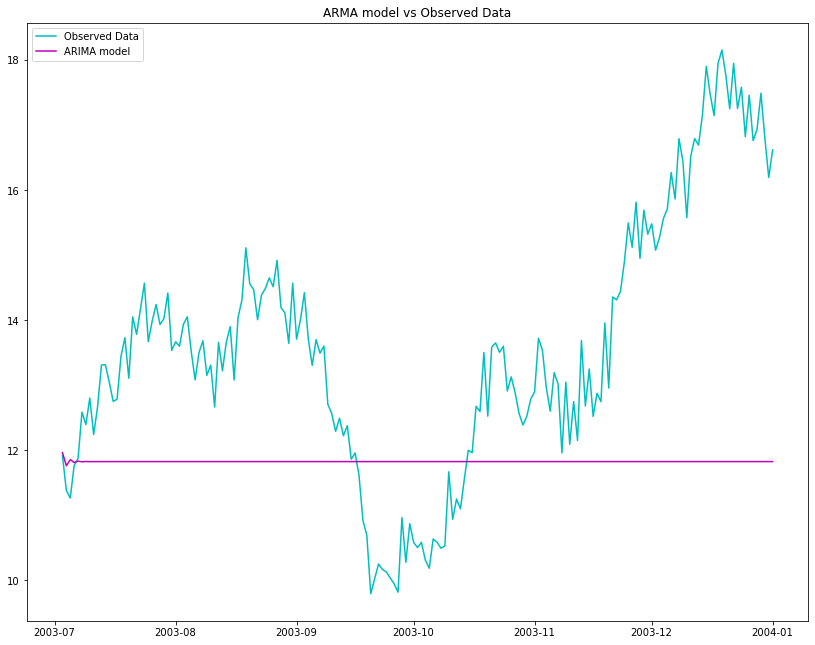

In [30]:
# ARIMA. mean forecast 
test_ = arma_results_.get_forecast(steps=183)
mean_ = test_.predicted_mean

# Visualize observed data & mean forecast predictions
plt.plot(churn_test_data, label='Observed Data', color='c')
plt.plot(churn_test_data.index, mean_, color='m', label='ARIMA model')
plt.title('ARMA model vs Observed Data')
plt.legend()
plt.show()

In [31]:
# Generate ARMA model. using the complete dataset
arma_model_ = SARIMAX(churn_data, order=(1, 1, 0), trend='c') 

# Fit model. to results
arma_results_ = arma_model_.fit() 

# Calculate forecast for. the next 365 days
fcast_ = arma_results_.get_forecast(steps=365)

# Calculate predicted. mean
p_mean_ = fcast_.predicted_mean

# Calculate Confidence. Intervals
ci_ = fcast_.conf_int()

# Generate forecast dates
dates_ = p_mean_.index

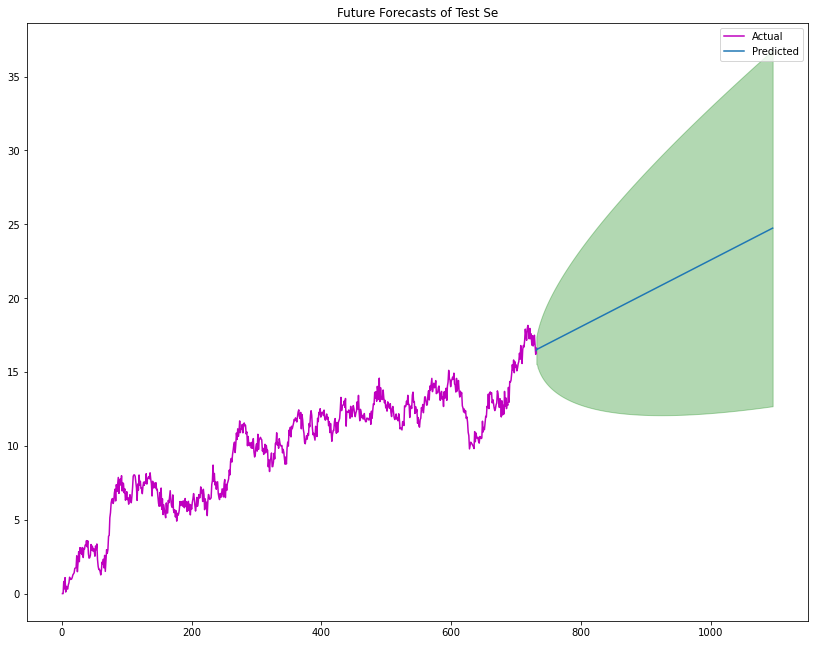

In [32]:
# Visualize combined future annual forecast 
# Reference: G4

plt.figure()
plt.plot(churn_data.index, churn_data, label='Actual', color='m') # Plot previous Revenue levels
plt.plot(dates_, p_mean_, label='Predicted') # Line plot of prediction means
plt.title('Future Forecasts of Test Se')
plt.fill_between(dates_, ci_.iloc[:, 0], ci_.iloc[:, 1], alpha=0.3, color='green')
plt.legend()
plt.show()

# 



# D4. OUTPUT AND CALCULATIONS
All the results and computations for the analysis are presented in the preceding sections.





# 






# D5. CODE
The code supporting the implementation of the time series model is likewise included in the preceding sections.

# 







# Part V: Data Summary and Implications


# E1. RESULTS

- The selection of an ARIMA model: As explained in D2 earlier, the model selection was based on finding the optimal parameters with the best BIC and AIC scores. In D1, differencing was applied to the Augmented Dickey-Fuller Test results, and subsequently, the seasonal order was removed from the model's selected parameters, as no seasonality was observed.

- The prediction interval of the forecast: The prediction interval provides an estimate, along with a range of likely values, for an unknown future observation. To calculate this interval, the get_forecast method was applied to the ARMA model, and then the conf_int() method was utilized on the model object to compute the confidence interval. As time moves farther away from the dataset, the prediction interval widens, indicating increased difficulty in making accurate predictions.

- A justification of the forecast length:  Considering the availability of only two years' worth of data, I made the decision to forecast revenue for only one year.

- The model evaluation procedure and error metric:The model's performance was evaluated using the mean absolute error (MAE) of 0.38, indicating that the residuals closely align with the expected Revenue. The diagnostic plots visualized earlier confirmed the model's suitability. Additionally, the model summary confirmed that the residuals were normally distributed and uncorrelated, further affirming the model's goodness of fit.


# 








# E2. ANNOTATED VISUALIZATION

As the test set contains data from the last six months, an annotated visualization of the forecast for the next six months is provided below using the model.

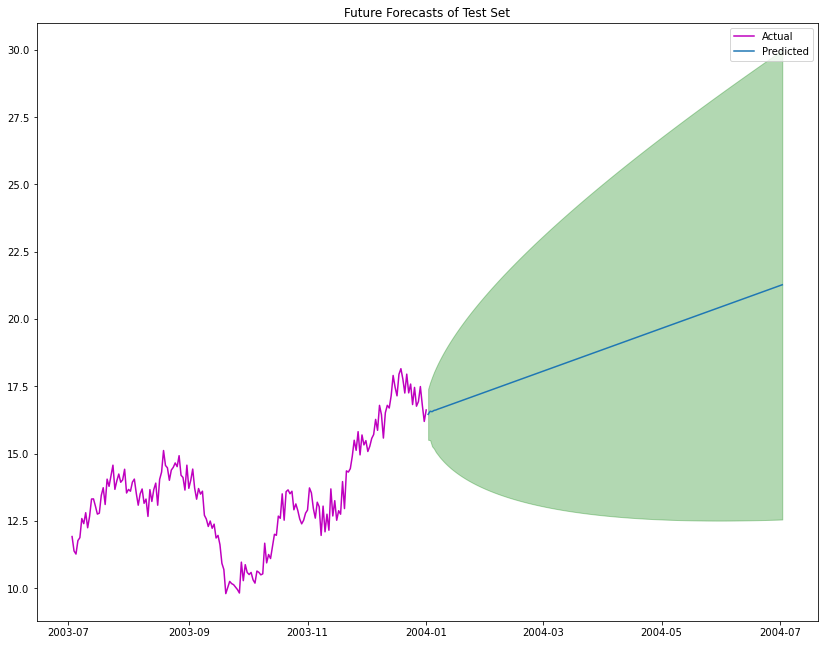

In [33]:
# Instantiate ARMA model. using test data set
arma_model_test_ = SARIMAX(churn_test_data, order=(1, 1, 0), trend='c')

# Fit model. to results
arma_results_test_ = arma_model_test_.fit() 

# Forecasting the ARIMA. mean
test_forecast_ = arma_results_test_.get_forecast(steps=183)
test_mean_ = test_forecast_.predicted_mean

# Calculating Confidence. Intervals
ci_test_ = test_forecast_.conf_int()

# Deriving forecast. dates
test_dates_ = test_mean_.index

plt.plot(churn_test_data.index, churn_test_data, label='Actual', color='m') # Plot test data
plt.plot(test_dates_, test_mean_, label='Predicted') # Line plot of prediction means
plt.title('Future Forecasts of Test Set')
plt.fill_between(test_dates_, ci_test_.iloc[:, 0], ci_test_.iloc[:, 1], alpha=0.3, color='green')
plt.legend()
plt.show()


# 






# E3. RECOMMENDATIONS

Based on the insights gained from the visualizations in unit D3, it appears that the trend in revenue is projected to remain constant over the next year. However, it is essential to conduct further in-depth analysis and gather more insights to understand the underlying reasons behind this stability in revenue.

By delving deeper into the data and performing additional investigations, we can identify the factors contributing to this consistent trend. These factors might include external market conditions, customer behavior, economic indicators, or other variables that influence revenue generation for network companies.

Once these key contributing factors are identified, stakeholders can strategically focus on improving those specific areas. By making targeted enhancements and optimizations in these crucial aspects, they can aim to potentially increase revenue over time. This approach ensures that resources and efforts are directed towards the most influential factors, leading to a more effective and impactful revenue growth strategy.

Therefore, a comprehensive analysis and understanding of the factors influencing revenue trends are essential for developing informed business decisions and implementing successful revenue-enhancing initiatives in the future.

# 






# Part VI: Reporting


# F. REPORTING

This document was produced using the Jupyter Notebook environment, and then converted to and reported in a PDF format.





# 


# G. SOURCES FOR THIRD-PARTY CODE

G1: https://datatofish.com/line-chart-python-matplotlib/

G2: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

G3: https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

G4: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

G5: https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621

# 




# H. SOURCES

H1: Smith T. (2021, August 25) Autocorrelation. Retrieved July 22 2023 at https://www.investopedia.com/terms/a/autocorrelation.asp#:~:text=Autocorrelation%20represents%20the%20degree%20of,value%20and%20its%20past%20values.

H2: Wu S. (2021, July 4) Stationarity Assumption in Time Series Data. Retrieved July 22 2023 at  at  https://towardsdatascience.com/stationarity-assumption-in-time-series-data-67ec93d0f2f